In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]=""
%load_ext autoreload
%autoreload 2
%load_ext line_profiler
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.animation as animation
import dragoman as dm
from scipy import stats
import scipy

In [2]:
plt.rcParams['figure.figsize'] = [10., 10.]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14 
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 14

In [3]:
from sklearn.datasets import fetch_openml

In [4]:
from tensorflow import keras
from sklearn.metrics import confusion_matrix

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [7]:
y = np.int32(y)

In [8]:
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

In [9]:
y_cat_test = keras.utils.to_categorical(y_test)
y_cat_train = keras.utils.to_categorical(y_train)

In [10]:
models = {}

In [11]:
name = 'simple'


inputs = keras.Input(shape=(X_train.shape[1],))
h = keras.layers.Dense(128, activation="relu")(inputs)
h = keras.layers.Dense(64, activation="relu")(h)
h = keras.layers.Dense(32, activation="relu")(h)
outputs = keras.layers.Dense(10, activation='softmax')(h)

models[name] = keras.Model(inputs=inputs, outputs=outputs)

optimizer = keras.optimizers.Adam(0.0001)

models[name].compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [12]:
models['simple'].summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [13]:
name = 'dropout'


inputs = keras.Input(shape=(X_train.shape[1],))
h = keras.layers.Dropout(0.01)(inputs)
h = keras.layers.Dense(128, activation="relu")(h)
h = keras.layers.Dropout(0.01)(h)
h = keras.layers.Dense(64, activation="relu")(h)
h = keras.layers.Dropout(0.01)(h)
h = keras.layers.Dense(32, activation="relu")(h)
outputs = keras.layers.Dense(10, activation='softmax')(h)

models[name] = keras.Model(inputs=inputs, outputs=outputs)

optimizer = keras.optimizers.Adam(0.0001)

models[name].compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [14]:
X_train.shape

(60000, 784)

In [15]:
name = 'batchnorm'


inputs = keras.Input(shape=(X_train.shape[1],))
h = keras.layers.Dense(128, activation="relu")(inputs)
h = keras.layers.BatchNormalization()(h)
h = keras.layers.Dense(64, activation="relu")(h)
h = keras.layers.BatchNormalization()(h)
h = keras.layers.Dense(32, activation="relu")(h)
outputs = keras.layers.Dense(10, activation='softmax')(h)

models[name] = keras.Model(inputs=inputs, outputs=outputs)

optimizer = keras.optimizers.Adam(0.0001)

models[name].compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [16]:
models['batchnorm'].summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330 

In [17]:
name = 'locally connected'


inputs = keras.Input(shape=(28, 28, 1))
h = keras.layers.LocallyConnected2D(1,  kernel_size=(5, 5), activation="relu")(inputs)
h = keras.layers.LocallyConnected2D(1,  kernel_size=(5, 5), activation="relu")(h)
h = keras.layers.Flatten()(h)
h = keras.layers.Dense(32, activation="relu")(h)
h = keras.layers.Dense(16, activation="relu")(h)
outputs = keras.layers.Dense(10, activation='softmax')(h)

models[name] = keras.Model(inputs=inputs, outputs=outputs)

optimizer = keras.optimizers.Adam(0.0001)

models[name].compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [18]:
name = 'cnn_simple'


inputs = keras.Input(shape=(28, 28, 1))
h = keras.layers.Conv2D(1,  kernel_size=(5, 5), activation="relu")(inputs)
h = keras.layers.Conv2D(1,  kernel_size=(5, 5), activation="relu")(h)
h = keras.layers.Flatten()(h)
h = keras.layers.Dense(32, activation="relu")(h)
h = keras.layers.Dense(16, activation="relu")(h)
outputs = keras.layers.Dense(10, activation='softmax')(h)

models[name] = keras.Model(inputs=inputs, outputs=outputs)

optimizer = keras.optimizers.Adam(0.0001)

models[name].compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [19]:
models['locally connected'].summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
locally_connected2d (Locally (None, 24, 24, 1)         14976     
_________________________________________________________________
locally_connected2d_1 (Local (None, 20, 20, 1)         10400     
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                12832     
_________________________________________________________________
dense_13 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                170 

In [20]:
name = 'CNN'


inputs = keras.Input(shape=(28, 28, 1))
h = keras.layers.Conv2D(32,  kernel_size=(3, 3), activation="relu")(inputs)
h = keras.layers.MaxPool2D(pool_size=(2,2))(h)
h = keras.layers.Conv2D(64,  kernel_size=(3, 3), activation="relu")(h)
h = keras.layers.MaxPool2D(pool_size=(2,2))(h)
h = keras.layers.Conv2D(64,  kernel_size=(3, 3), activation="relu")(h)
h = keras.layers.Flatten()(h)
h = keras.layers.Dense(16, activation="relu")(h)
outputs = keras.layers.Dense(10, activation='softmax')(h)

models[name] = keras.Model(inputs=inputs, outputs=outputs)

optimizer = keras.optimizers.Adam(0.0001)

models[name].compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [21]:
models['CNN'].summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0   

In [27]:
name = 'CNN + Dropout + Batchnorm'


inputs = keras.Input(shape=(28, 28, 1))
h = keras.layers.Dropout(0.01)(inputs)
h = keras.layers.Conv2D(32,  kernel_size=(3, 3), activation="relu")(h)
h = keras.layers.BatchNormalization()(h)
h = keras.layers.MaxPool2D(pool_size=(2,2))(h)
h = keras.layers.Conv2D(64,  kernel_size=(3, 3), activation="relu")(h)
h = keras.layers.BatchNormalization()(h)
h = keras.layers.MaxPool2D(pool_size=(2,2))(h)
h = keras.layers.Conv2D(64,  kernel_size=(3, 3), activation="relu")(h)
h = keras.layers.BatchNormalization()(h)
h = keras.layers.Flatten()(h)
h = keras.layers.Dense(16, activation="relu")(h)
outputs = keras.layers.Dense(10, activation='softmax')(h)

models[name] = keras.Model(inputs=inputs, outputs=outputs)

optimizer = keras.optimizers.Adam(0.0001)

models[name].compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [28]:
models[name].summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_5 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 11, 11, 64)        256 

In [25]:
# train 1d models

models[name].fit(X_train, y_cat_train, epochs=30, validation_data=(X_test, y_cat_test), batch_size=64)

Epoch 1/30


ValueError: in user code:

    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:531 train_step  **
        y_pred = self(x, training=True)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/network.py:719 call
        convert_kwargs_to_constants=base_layer_utils.call_context().saving)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/network.py:888 _run_internal_graph
        output_tensors = layer(computed_tensors, **kwargs)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:886 __call__
        self.name)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:180 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer conv2d_5 is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: [None, 784]


In [29]:
# traind 2d models

models[name].fit(X_train.reshape(-1, 28, 28, 1), y_cat_train, epochs=30, validation_data=(X_test.reshape(-1, 28, 28, 1), y_cat_test), batch_size=64)

Epoch 1/30
938/938 [==============================] - 10s 10ms/step - loss: 0.4763 - accuracy: 0.8600 - val_loss: 0.1234 - val_accuracy: 0.9676
Epoch 2/30
938/938 [==============================] - 9s 10ms/step - loss: 0.0986 - accuracy: 0.9737 - val_loss: 0.0726 - val_accuracy: 0.9795
Epoch 3/30
938/938 [==============================] - 9s 10ms/step - loss: 0.0601 - accuracy: 0.9832 - val_loss: 0.0572 - val_accuracy: 0.9824
Epoch 4/30
 49/938 [>.............................] - ETA: 8s - loss: 0.0439 - accuracy: 0.9895

KeyboardInterrupt: 

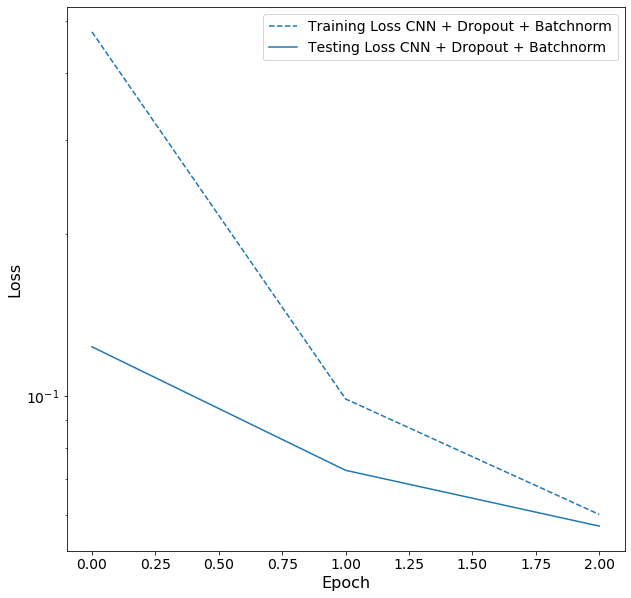

In [32]:
for name in models.keys(): #['simple', 'CNN + Dropout + Batchnorm']: #'dropout', 'batchnorm']:
    #bl = plt.plot(models[name].history.history['accuracy'], ls='--', label='Training Accuracy %s'%name)
    #plt.plot(models[name].history.history['val_accuracy'], ls='-', c=bl[0].get_color(), label='Testing Accuracy %s'%name)
    try:
        bl = plt.plot(models[name].history.history['loss'], ls='--', label='Training Loss %s'%name)
        plt.plot(models[name].history.history['val_loss'], ls='-', c=bl[0].get_color(), label='Testing Loss %s'%name)
    except AttributeError:
        pass
plt.gca().set_xlabel('Epoch')
plt.gca().set_ylabel('Loss')
plt.legend()
plt.gca().set_yscale('log')
#plt.savefig('NN_history_cnn_best.png', bbox_inches='tight')

In [36]:
# predict 1d model
#y_pred = models[name].predict(X_test)

# predict 2d model
y_pred = models[name].predict(X_test.reshape(-1, 28, 28, 1))

In [37]:
cm = confusion_matrix(y_test, np.argmax(y_pred,axis=1))

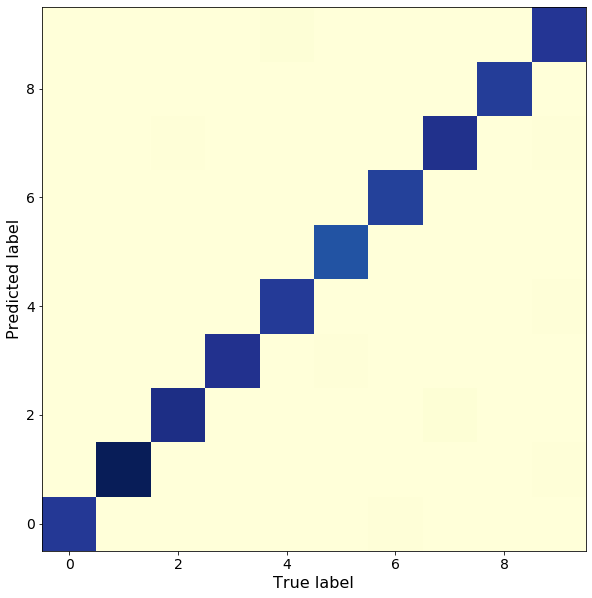

In [38]:
plt.imshow(cm.T, cmap='YlGnBu', origin='lower')
plt.gca().set_xlabel('True label')
plt.gca().set_ylabel('Predicted label')
plt.savefig('NN_consfusion_%s.png'%name, bbox_inches='tight')

# Auto encoder

In [51]:
# linear

inputs = keras.Input(shape=(X_train.shape[1],))
h = keras.layers.Dense(20, activation="linear", use_bias=False)(inputs)
outputs = keras.layers.Dense(X_train.shape[1], activation='linear', use_bias=False)(h)

ae = keras.Model(inputs=inputs, outputs=outputs)

In [52]:
optimizer = keras.optimizers.Adam(0.00001)

ae.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])

In [41]:
ae.fit(X, X, epochs=30, batch_size=32)

Epoch 1/30
2188/2188 [==============================] - 2s 1ms/step - loss: 5956.3721 - accuracy: 0.0034
Epoch 2/30
2188/2188 [==============================] - 2s 1ms/step - loss: 4175.3047 - accuracy: 0.0076
Epoch 3/30
2188/2188 [==============================] - 2s 1ms/step - loss: 3883.2502 - accuracy: 0.0094
Epoch 4/30
2188/2188 [==============================] - 2s 1ms/step - loss: 3494.8745 - accuracy: 0.0123
Epoch 5/30
2188/2188 [==============================] - 2s 1ms/step - loss: 3151.2131 - accuracy: 0.0140
Epoch 6/30
2188/2188 [==============================] - 2s 1ms/step - loss: 2892.7356 - accuracy: 0.0118
Epoch 7/30
2188/2188 [==============================] - 2s 1ms/step - loss: 2696.8523 - accuracy: 0.0106
Epoch 8/30
2188/2188 [==============================] - 2s 1ms/step - loss: 2543.3826 - accuracy: 0.0110
Epoch 9/30
2188/2188 [==============================] - 3s 1ms/step - loss: 2414.9338 - accuracy: 0.0113
Epoch 10/30
 617/2188 [=======>......................] 

KeyboardInterrupt: 

In [42]:
encode = keras.Model(inputs=inputs, outputs=h)

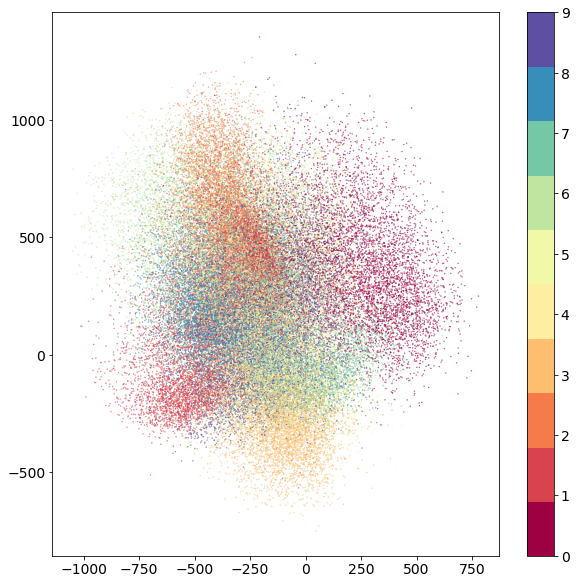

In [44]:
reduced_data = encode(X).numpy()

plt_data = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=0.1, c=y ,cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar()
#plt.savefig('mnist_encoded_true_labels.png', bbox_inches='tight')

In [45]:
from sklearn.decomposition import PCA
p = PCA(n_components=20)
p.fit_transform(X)
reduced_data_pca = p.transform(X)
X_reco_pca = p.inverse_transform(reduced_data_pca) #+ mean

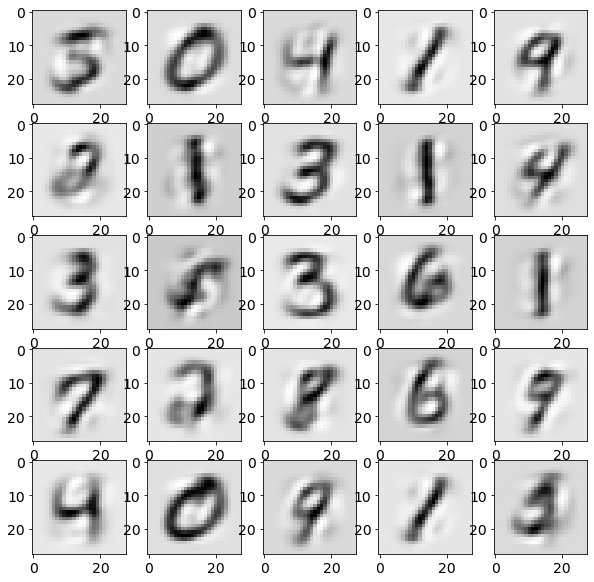

In [47]:
X_reco = ae(X)

#X_plot = X_reco.numpy() - X_reco_pca
X_plot = X_reco_pca


mask = slice(None)

fig, ax = plt.subplots(5,5)
for i in range(25):
    axis = ax[i//5, i%5]
    axis.imshow(X_plot[mask][i].reshape(28,28), cmap='Greys')
    
    
#plt.suptitle('Class: 1, 4, 5, 7, 9')
#plt.suptitle('Class: 0, 2, 3, 6, 8')
    
#plt.savefig('mnist_ae_pca_diff.png', bbox_inches='tight')
#plt.savefig('mnist_pca20.png', bbox_inches='tight')

In [48]:
np.var(X_reco) / np.var(X_test)

0.6117674476659094

In [49]:
np.var(X_reco_pca) / np.var(X_test)

0.738975067971039

In [50]:
np.var(X_test)

6268.278932684276

In [53]:
inputs = keras.Input(shape=(X_train.shape[1],))
encoded = keras.layers.Dense(256, activation="relu")(inputs)
encoded = keras.layers.Dense(64, activation="relu")(encoded)
encoded = keras.layers.Dense(2, activation="relu")(encoded)
decoder1 = keras.layers.Dense(64, activation="relu")
decoded = decoder1(encoded)
decoder2 = keras.layers.Dense(256, activation="relu")
decoded = decoder2(decoded)
decoder_out = keras.layers.Dense(X_train.shape[1], activation='linear')
outputs = decoder_out(decoded)

ae = keras.Model(inputs=inputs, outputs=outputs)

In [54]:
optimizer = keras.optimizers.Adam(0.001)

ae.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])

In [63]:
ae.fit(X_train, X_train, epochs=30, validation_data=(X_test, X_test), batch_size=64)

Epoch 1/30
938/938 [==============================] - 3s 3ms/step - loss: 3603.6929 - accuracy: 0.0139 - val_loss: 3326.2273 - val_accuracy: 0.0125
Epoch 2/30
938/938 [==============================] - 3s 3ms/step - loss: 3191.9658 - accuracy: 0.0121 - val_loss: 3068.5581 - val_accuracy: 0.0070
Epoch 3/30
938/938 [==============================] - 3s 3ms/step - loss: 3053.8271 - accuracy: 0.0110 - val_loss: 3006.0205 - val_accuracy: 0.0113
Epoch 4/30
938/938 [==============================] - 3s 3ms/step - loss: 2967.5930 - accuracy: 0.0130 - val_loss: 2914.7849 - val_accuracy: 0.0108
Epoch 5/30
938/938 [==============================] - 3s 3ms/step - loss: 2903.2493 - accuracy: 0.0127 - val_loss: 2902.8193 - val_accuracy: 0.0108
Epoch 6/30
938/938 [==============================] - 3s 3ms/step - loss: 2861.6377 - accuracy: 0.0122 - val_loss: 2837.6863 - val_accuracy: 0.0117
Epoch 7/30
938/938 [==============================] - 3s 3ms/step - loss: 2828.7700 - accuracy: 0.0117 - val_los

KeyboardInterrupt: 

In [64]:
encode = keras.Model(inputs=inputs, outputs=encoded)

In [65]:
dec_inp = keras.Input(shape=2,)
decoded_i = decoder1(dec_inp)
decoded_i = decoder2(decoded_i)
outputs_i = decoder_out(decoded_i)
decode = keras.Model(inputs=dec_inp, outputs=outputs_i)

In [66]:
reduced_data = encode(X).numpy()
reduced_data

array([[207.20494 , 435.92395 ],
       [ 68.03875 , 977.70013 ],
       [439.6689  , 403.95212 ],
       ...,
       [314.0121  , 156.78476 ],
       [ 93.295944, 159.59032 ],
       [774.1734  , 956.1539  ]], dtype=float32)

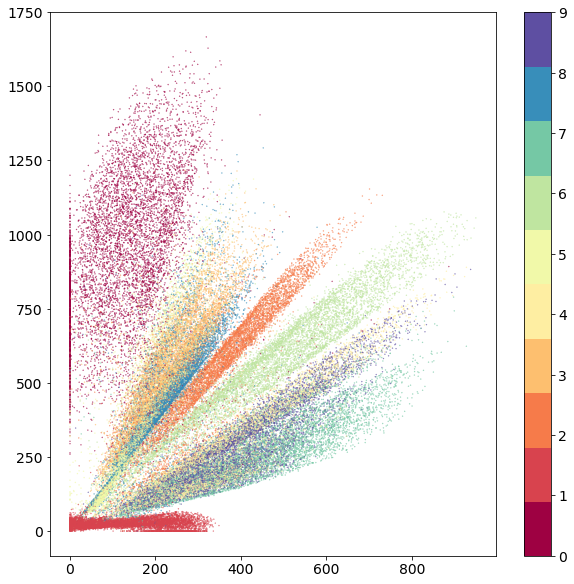

In [67]:
plt_data = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=0.1, c=y ,cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar()
#plt.savefig('mnist_encoded_linear_true_labels.png', bbox_inches='tight')

In [68]:
inp = np.array([[100., 100.],]).astype(np.float32)
o = decode(inp).numpy()

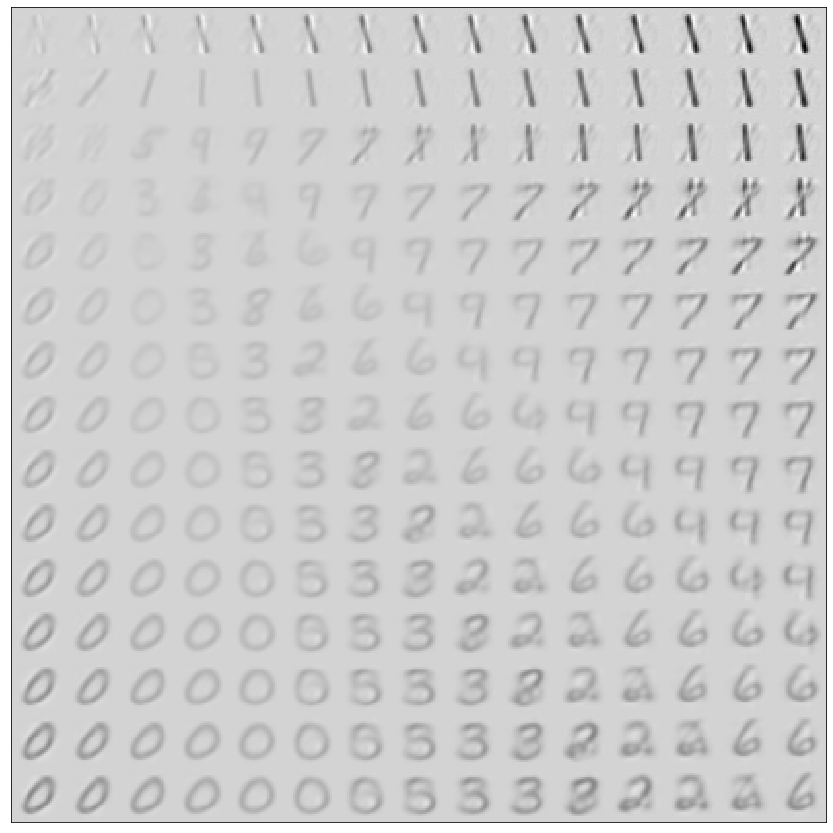

In [69]:
# display a 2D manifold of the digits
n = 15 # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

grid_x = np.linspace(-100., 1600, n)
grid_y = np.linspace(-100., 1200, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]]).astype(np.float32)
        x_decoded = decode.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(15, 15))
plt.imshow(figure, cmap='Greys')

plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)


#plt.savefig('AE_mnist.png', bbox_inches='tight')

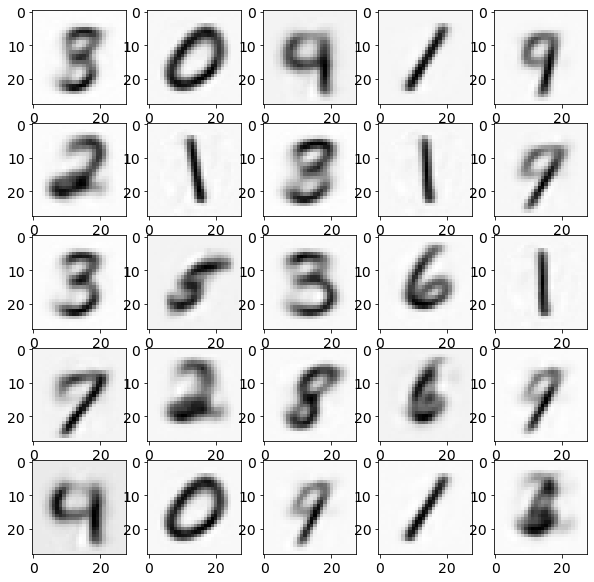

In [70]:
X_reco = ae(X)

X_plot = X_reco.numpy()

mask = slice(None)

fig, ax = plt.subplots(5,5)
for i in range(25):
    axis = ax[i//5, i%5]
    axis.imshow(X_plot[mask][i].reshape(28,28), cmap='Greys')
    
    
#plt.suptitle('Class: 1, 4, 5, 7, 9')
#plt.suptitle('Class: 0, 2, 3, 6, 8')
    
#plt.savefig('mnist_autoencode_20d.png', bbox_inches='tight')